#  №1   Известно, что мальчики рождаются с вероятностью 0.515.

# a)

#Постройте график распределения вероятностей для случайной
#величины X — количества рождённых девочек для семьи c 9 детьми.
#Все дети рождаются независимо друг от друга.

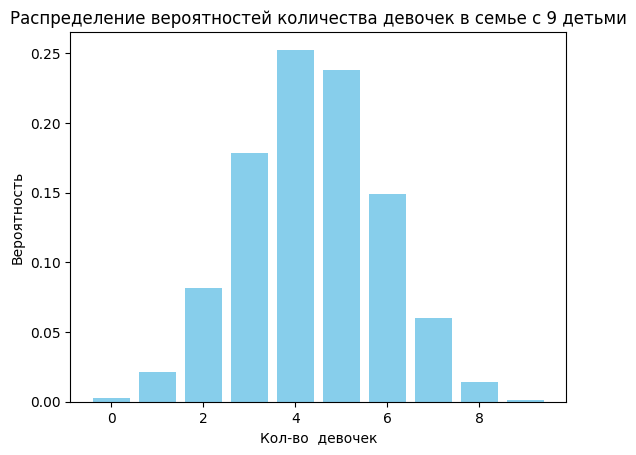

In [ ]:
#Распределение Бернулли

import matplotlib.pyplot as plt
import scipy.stats as stats

# вероятность рождения мальчика
p_boy = 0.515
# вероятность рождения девочки
p_girl = 1 - p_boy

# Кол-во детей
n_children = 9

# Создание биномиального распределения
x_values = list(range(n_children + 1))
probabilities = [stats.binom.pmf(k, n_children, p_girl) for k in x_values]

#График
plt.bar(x_values, probabilities, color='skyblue')
plt.xlabel('Кол-во  девочек')
plt.ylabel('Вероятность')
plt.title('Распределение вероятностей количества девочек в семье с 9 детьми')
plt.show()

# b)

# Используя полученное распределение, найдите с какой
# вероятностью в семье с 9 детьми родится хотя бы 4 мальчика.

In [ ]:
# Биномиальное распределение

import scipy.stats as stats

#вероятность рождения мальчика
p_boy = 0.515

#Кол-во детей
n_children = 9

# Вероятность того, что родится хотя бы 4 мальчика

prob_at_least_4_boys = 1 - stats.binom.cdf(3, n_children, p_boy)

prob_at_least_4_boys

0.774722539054326

In [ ]:
#   77.47%

 # c)

#Рассчитайте мат.ожидание и стандартное отклонение для X и сделайте
#вывод по правилу трёх сигм в каком промежутке будет лежать число
#рождённых девочек для подавляющего большинства семей c 9 детьми.

In [ ]:
# Биноминальное распределение
# Правило трех сигм

# Вероятность рождения девочки
p_girl = 1 - p_boy

#математическое ожидание (среднее)
mean_girls = n_children * p_girl

#стандартное отклонение
std_dev_girls = (n_children * p_girl * (1 - p_girl)) ** 0.5

range_low = mean_girls - 3 * std_dev_girls
range_high = mean_girls + 3 * std_dev_girls

mean_girls, std_dev_girls, range_low, range_high

(4.365, 1.499324848056618, -0.1329745441698531, 8.862974544169854)

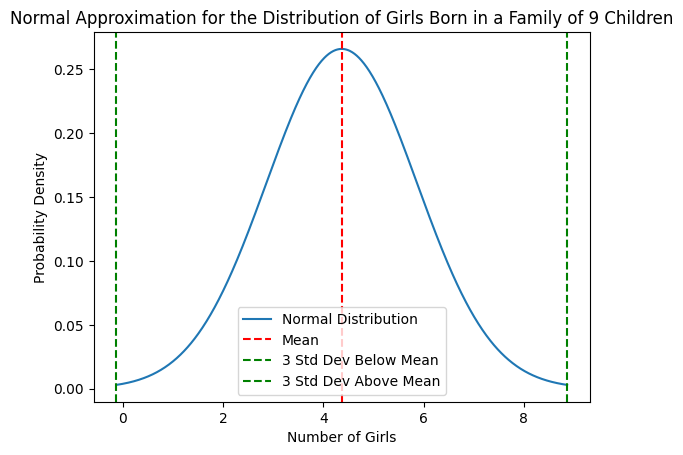

In [ ]:
import numpy as np

#Генерация значений x
x = np.linspace(mean_girls - 3 * std_dev_girls, mean_girls + 3 * std_dev_girls, 1000)
#Нормальное распределение с центром в среднем значении и стандартным отклонением
normal_distribution = stats.norm.pdf(x, mean_girls, std_dev_girls)

#Визуализация
plt.plot(x, normal_distribution, label='Normal Distribution')
plt.axvline(x=mean_girls, color='red', linestyle='--', label='Mean')
plt.axvline(x=range_low, color='green', linestyle='--', label='3 Std Dev Below Mean')
plt.axvline(x=range_high, color='green', linestyle='--', label='3 Std Dev Above Mean')
plt.title('Normal Approximation for the Distribution of Girls Born in a Family of 9 Children')
plt.xlabel('Number of Girls')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# d)

#Чему будет равно значение (кумулятивной) функции распределения для
#этого распределения при X = 6.1, то есть F(6.1)?

In [ ]:
# Биноминальное распределение

F_6_1 = stats.binom.cdf(6.1, n_children, p_girl)
F_6_1

0.9240540312467562

In [ ]:
# 92.4%

# №2   Резиденты жилых комплексов принимают предложение установить новую
#систему шумоподавления с вероятностью 7%.
#147 жильцам одного из комплексов отправили предложение установить
#систему. С какой вероятностью предложение примут:

#a)

In [ ]:
# Биноминальное распределение

# Параметры биномиального распределения
n_residents = 147  # Общее количество жильцов
p_accept = 0.07    # Вероятность принятия предложения

# Расчет вероятности, что ровно 12 жильцов примут предложение
prob_12_accept = stats.binom.pmf(12, n_residents, p_accept)
prob_12_accept

0.10317230850577083

In [ ]:
10.32%

# b)

In [ ]:
# Нормальное распределение

n_residents = 147  #Общее количество жильцов
p_accept = 0.07    #Вероятность принятия предложения

# Математическое ожидание и стандартное отклонение для биномиального распределения
mean = n_residents * p_accept  # n * p
std_dev = (n_residents * p_accept * (1 - p_accept)) ** 0.5  # sqrt(n * p * (1 - p))

# Пересчет вероятности
prob_10_to_12_normal_only = stats.norm.cdf(12.5, mean, std_dev) - stats.norm.cdf(9.5, mean, std_dev)
3prob_10_to_12_normal_only

0.3632940700219458

In [ ]:
# 36.32%

# c)

In [ ]:
#распределения Пуассона
lambda_poisson = n_residents * p_accept


prob_less_than_10_poisson = stats.poisson.cdf(9, lambda_poisson)
prob_less_than_10_poisson

0.42221294207242627

In [ ]:
# 42.22%

# №3

# VIP-клиенты компании предъявляют пафосные претензии с обычной
#интенсивностью 11 претензий в неделю. Найдите вероятность, что на
#следующей неделе поступит:

# a)

In [ ]:
#распределения Пуассона

from math import exp, factorial

# Среднее количество претензий в неделю
lambda_ = 11

# Функция для расчета вероятности по формуле Пуассона
def poisson_probability(k, lambda_):
    return (lambda_ ** k * exp(-lambda_)) / factorial(k)

# Расчет вероятности для каждого случая (от 0 до 4 претензий)
probabilities = [poisson_probability(k, lambda_) for k in range(5)]

# Суммирование вероятностей
total_probability = sum(probabilities)
total_probability

0.015104600652178418

Ответ: 15.10 %

## b)

In [ ]:
# Расчет вероятности для каждого случая (от 0 до 12 претензий)
probabilities_less_than_13 = [poisson_probability(k, lambda_) for k in range(13)]

# Суммирование вероятностей
total_probability_less_than_13 = sum(probabilities_less_than_13)

# Вычитаем из 1 для получения вероятности 13 и более претензий
probability_13_or_more = 1 - total_probability_less_than_13
probability_13_or_more

0.3113033485359312

Ответ: 31.13 %

## №4

# Веса контейнеров, которые отправляет компания “Вжух”, распределены
#нормально:
#W ∼ N(84 кг, 16 кг2).
#Найдите с какой вероятностью вес случайно взятого контейнера окажется:

# а)

In [ ]:
from scipy.stats import norm

mu = 84  # математическое ожидание
sigma = 16**0.5  # стандартное отклонение

# Интервал вокруг 85 кг
lower_bound = 84.95
upper_bound = 85.05

probability = norm(mu, sigma).cdf(upper_bound) - norm(mu, sigma).cdf(lower_bound)
probability

#0.096%

0.00966646692175166

# b)

In [ ]:
from scipy.stats import norm

mu = 84  # математическое ожидание
sigma = 16**0.5  # стандартное отклонение
lower_bound_new = 80
upper_bound_new = 85

# Рассчитываем вероятность того, что вес будет в этом новом интервале
probability_new_interval = norm(mu, sigma).cdf(upper_bound_new) - norm(mu, sigma).cdf(lower_bound_new)
probability_new_interval

#44%

0.4400510717514666

#c)

In [ ]:
from scipy.stats import norm

mu = 84  # математическое ожидание
sigma = 16**0.5  # стандартное отклонение

probability_less_than_80 = norm(mu, sigma).cdf(80)
probability_less_than_80

#15.86%

0.15865525393145707

#d)

In [ ]:

from scipy.stats import norm

mu = 84  # математическое ожидание
sigma = 16**0.5  # стандартное отклонение
probability_greater_than_90 = 1 - norm(mu, sigma).cdf(90)
probability_greater_than_90

#0.66%

0.06680720126885809

### №5

#Комания “Вжух” решила отправлять 80% самых легких грузов одним
#способом отправки, а 20% самых тяжелых — другим. Какой вес груза им
#нужно взять как пороговый, чтобы рассортировать грузы между этими двумя
#способами отправки?

In [ ]:

percentile_80 = norm(mu, sigma).ppf(0.8)
percentile_80

87.36648493429166